## Recolha de dados Financeiros: Stocks e Commodities**

### **Objetivo**
Coletar e analisar dados diários de preços de fechamento das **ações selecionadas tendo em conta o problema * e **15 commodities** para:
- Identificar relações estatísticas (cointegração).
- Agrupar ativos com comportamentos semelhantes (clustering).
- Testar estacionaridade das séries temporais.

---

### **Passos Realizados**
1. **Coleta de Dados**:
   - Uso da biblioteca `yfinance` para baixar dados diários (2020-2025).
2. **Limpeza dos Dados**:
   - Remoção de tickers inválidos ou deslistados.
3. **Próximos Passos**:
   - Análise de cointegração, clustering e testes de estacionaridade.

---

### **Ferramentas Utilizadas**
- Python com `yfinance`, `pandas`, `numpy`, `statsmodels`, `scipy` e `matplotlib`.

---

### **Exemplo de Dados**
| Date       | AAPL   | MSFT   | CL=F  | GC=F  |
|------------|--------|--------|-------|-------|
| 2020-01-02 | 72.00  | 150.00 | 61.00 | 1550.00|
| 2020-01-03 | 71.50  | 149.50 | 60.50 | 1545.00|

# 📜 Lista de Commodities e seus Tickers  

## ⚡ Energia  
- **CL=F** → Petróleo WTI (Crude Oil)  
- **BZ=F** → Petróleo Brent (Brent Crude Oil)  
- **NG=F** → Gás Natural (Natural Gas)  
- **RB=F** → Gasolina Reformulada (RBOB Gasoline)  
- **HO=F** → Óleo de Aquecimento (Heating Oil)  
- **QA=F** → Propano Mont Belvieu (Propane MB)  
- **QU=F** → Butano (Butane)  
- **QG=F** → Gás Natural Henry Hub (Natural Gas Henry Hub)  
- **QH=F** → Eletricidade PJM (PJM Electricity)  

## 🔩 Metais  
- **GC=F** → Ouro (Gold)  
- **SI=F** → Prata (Silver)  
- **HG=F** → Cobre (Copper)  
- **PL=F** → Platina (Platinum)  
- **PA=F** → Paládio (Palladium)  
- **ALI=F** → Alumínio (Aluminum - LME)  
- **LZS=F** → Zinco (Zinc - LME)  
- **LCO=F** → Níquel (Nickel - LME)  
- **LLO=F** → Chumbo (Lead - LME)  
- **FEF=F** → Minério de Ferro (Iron Ore - CME)  
- **MHC=F** → Cobre de Xangai (Shanghai Copper - SHFE)  
- **MAL=F** → Alumínio de Xangai (Shanghai Aluminum - SHFE)  

## 🌾 Grãos e Oleaginosas  
- **ZS=F** → Soja (Soybeans)  
- **ZM=F** → Farelo de Soja (Soybean Meal)  
- **ZL=F** → Óleo de Soja (Soybean Oil)  
- **ZW=F** → Trigo Chicago (Wheat - CBOT)  
- **KE=F** → Trigo Kansas (Hard Red Wheat - KCBT)  
- **MW=F** → Trigo Primavera (Spring Wheat - MGEX)  
- **ZC=F** → Milho (Corn)  
- **ZO=F** → Aveia (Oats)  
- **ZR=F** → Arroz (Rough Rice)  
- **RS=F** → Canola (Rapeseed)  
- **BO=F** → Óleo de Palma (Palm Oil - Bursa Malaysia)  
- **SM=F** → Farelo de Palma (Palm Kernel Meal)  

## 🌱 Soft Commodities (Agrícolas)  
- **CC=F** → Cacau (Cocoa)  
- **CJ=F** → Cacau de Londres (London Cocoa)  
- **CT=F** → Algodão (Cotton)  
- **SB=F** → Açúcar nº 11 (Sugar No.11)  
- **YO=F** → Açúcar nº 16 (Sugar No.16)  
- **KC=F** → Café Arábica (Coffee - Arabica ICE)  
- **DF=F** → Café Robusta (Coffee - Robusta ICE)  
- **OJ=F** → Suco de Laranja (Orange Juice)  
- **CO=F** → Óleo de Coco (Coconut Oil)  
- **TU=F** → Borracha Natural (Rubber - TOCOM)  

## 🐄 Pecuária e Carnes  
- **LE=F** → Gado Vivo (Live Cattle)  
- **GF=F** → Bezerros de Engorda (Feeder Cattle)  
- **HE=F** → Suínos Magros (Lean Hogs)  
- **DA=F** → Leite Classe III (Class III Milk)  
- **DC=F** → Leite Classe IV (Class IV Milk)  
- **LB=F** → Madeira Serrada (Lumber - CME)  


In [1]:
# Libraries
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime

# Configuração para evitar warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:


# 1. Lista Atualizada de Tickers (S&P 500 + Commodities) - APENAS OS QUE FUNCIONARAM
stock_tickers = [
    # Energia (Petróleo & Gás)
    'XOM', 'CVX', 'SHEL', 'BP', 'TTE', 'COP', 'OXY', 'PBR', 'VLO', 'PSX', 'MPC', 'EOG', 
    'HES', 'DVN', 'KMI', 'WMB', 'LNG', 'EQT', 'APA', 'HAL', 'SLB', 'BKR',

    # Metais & Mineração
    'NEM', 'GOLD', 'AEM', 'FNV', 'WPM', 'PAAS', 'AG', 'HL', 'FCX', 'SCCO', 'AA', 'RIO', 
    'BHP', 'VALE', 'GLNCY', 'LAC', 'MP', 'SBSW', 'TECK', 'CLF', 'X', 'NUE',

    # Agronegócio & Alimentos (removido HRL que falhou)
    'ADM', 'BG', 'DE', 'NTR', 'TSN', 'SJM', 'CAG', 'GIS', 'K', 'HSY', 'MDLZ',
    'BYND', 'DAR', 'INGR', 'CALM',

    # Tecnologia (removido UBER que falhou)
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA', 'INTC', 'AMD', 'AVGO', 'QCOM',
    'TXN', 'ADBE', 'CRM', 'ORCL', 'IBM', 'CSCO', 'NOW', 'SHOP', 'PYPL',

    # Bens Industriais
    'CAT', 'BA', 'MMM', 'HON', 'GE', 'LMT', 'RTX', 'GD', 'NOC', 'EMR', 'ITW', 'FAST',
    'DOV', 'ETN', 'PH', 'AME', 'ROK', 'SWK',

    # Varejo & Consumo (removido RIVN que falhou)
    'WMT', 'TGT', 'COST', 'HD', 'LOW', 'SBUX', 'MCD', 'YUM', 'DPZ', 'CMG', 'NKE',
    'ULTA', 'BBY', 'DG', 'DLTR', 'F', 'GM',

    # Saúde & Biotech
    'JNJ', 'PFE', 'MRK', 'ABT', 'AMGN', 'GILD', 'BMY', 'UNH', 'LLY', 'REGN', 'VRTX',
    'CVS', 'WBA', 'DHR', 'SYK', 'MDT', 'ISRG', 'ZTS',

    # Financeiro
    'JPM', 'BAC', 'WFC', 'C', 'GS', 'MS', 'SCHW', 'BLK', 'AXP', 'V', 'MA',

    # Utilities e Serviços
    'NEE', 'DUK', 'SO', 'D', 'AEP', 'EXC', 'SRE', 'WEC', 'AWK', 'ECL', 'RSG', 'WM',
    'HUM', 'T', 'VZ', 'TMUS', 'CHTR', 'CMCSA'
]

# Commodities que funcionaram
commodity_tickers = [
    # Energia
    'CL=F', 'BZ=F', 'NG=F', 'RB=F', 'HO=F', 'QA=F', 'QU=F', 'QG=F', 'QH=F',
    
    # Metais
    'GC=F', 'SI=F', 'HG=F', 'PL=F', 'PA=F', 'ALI=F',
    
    # Grãos e Oleaginosas
    'ZS=F', 'ZM=F', 'ZL=F', 'ZW=F', 'ZC=F', 'ZO=F', 'ZR=F', 'KE=F',
    'BO=F', 'SM=F', 'RR=F',
    
    # Soft Commodities
    'CC=F', 'CJ=F', 'SB=F', 'YO=F', 'KC=F', 'OJ=F',
    
    # Pecuária e Carnes
    'LE=F', 'GF=F', 'HE=F', 'DA=F', 'DC=F', 'LB=F', 'FC=F', 'LH=F',
    
    # Químicos
    'HY=F'
]

all_tickers = stock_tickers + commodity_tickers

# 2. Função para Download de Dados (MESMA ESTRUTURA ORIGINAL)
def download_data(tickers, start_date, end_date):
    """
    Baixa dados do Yahoo Finance com tratamento robusto de erros
    """
    try:
        print(f"Baixando {len(tickers)} ativos...")
        data = yf.download(
            tickers, 
            start=start_date, 
            end=end_date,
            progress=False,
            group_by='ticker',
            threads=True
        )
        
        if len(tickers) > 1:
            closes = pd.DataFrame({t: data[t]['Close'] for t in tickers if t in data})
        else:
            closes = pd.DataFrame(data['Close'])
            closes.columns = tickers
            
        return closes.dropna(how='all', axis=1)
    
    except Exception as e:
        print(f"Erro no download em massa: {e}")
        return pd.DataFrame()

# 3. Download dos Dados
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

print("Baixando dados dos tickers validados...")
data = download_data(all_tickers, start_date, end_date)

# 4. Verificação Final
print("\nResumo Final:")
print(f"- Total de tickers solicitados: {len(all_tickers)}")
print(f"- Tickers com dados obtidos: {len(data.columns)}")
print(f"- Tickers sem dados: {len(set(all_tickers) - set(data.columns))}")

# 5. Salvando os Dados (MESMO NOME DO ARQUIVO ORIGINAL)
data.to_csv('stocks_commodities_data.csv')
print("\nDados salvos em 'stocks_commodities_data.csv'")

# Mostrar amostra
print("\nAmostra dos dados:")
print(data.iloc[:3, :5])

Baixando dados dos tickers validados...
Baixando 202 ativos...
YF.download() has changed argument auto_adjust default to True

Resumo Final:
- Total de tickers solicitados: 202
- Tickers com dados obtidos: 202
- Tickers sem dados: 0

Dados salvos em 'stocks_commodities_data.csv'

Amostra dos dados:
                  XOM        CVX       SHEL         BP        TTE
Date                                                             
2020-01-02  55.137974  96.158684  48.650627  28.746151  39.543095
2020-01-03  54.694695  95.826096  49.033367  29.266211  39.686195
2020-01-06  55.114647  95.501434  49.644138  30.034979  40.430260


Dados carregados com sucesso. Shape: (1325, 202)

Pré-processando dados...

Separando stocks e commodities...

Calculando correlações rolling...

Criando visualizações...


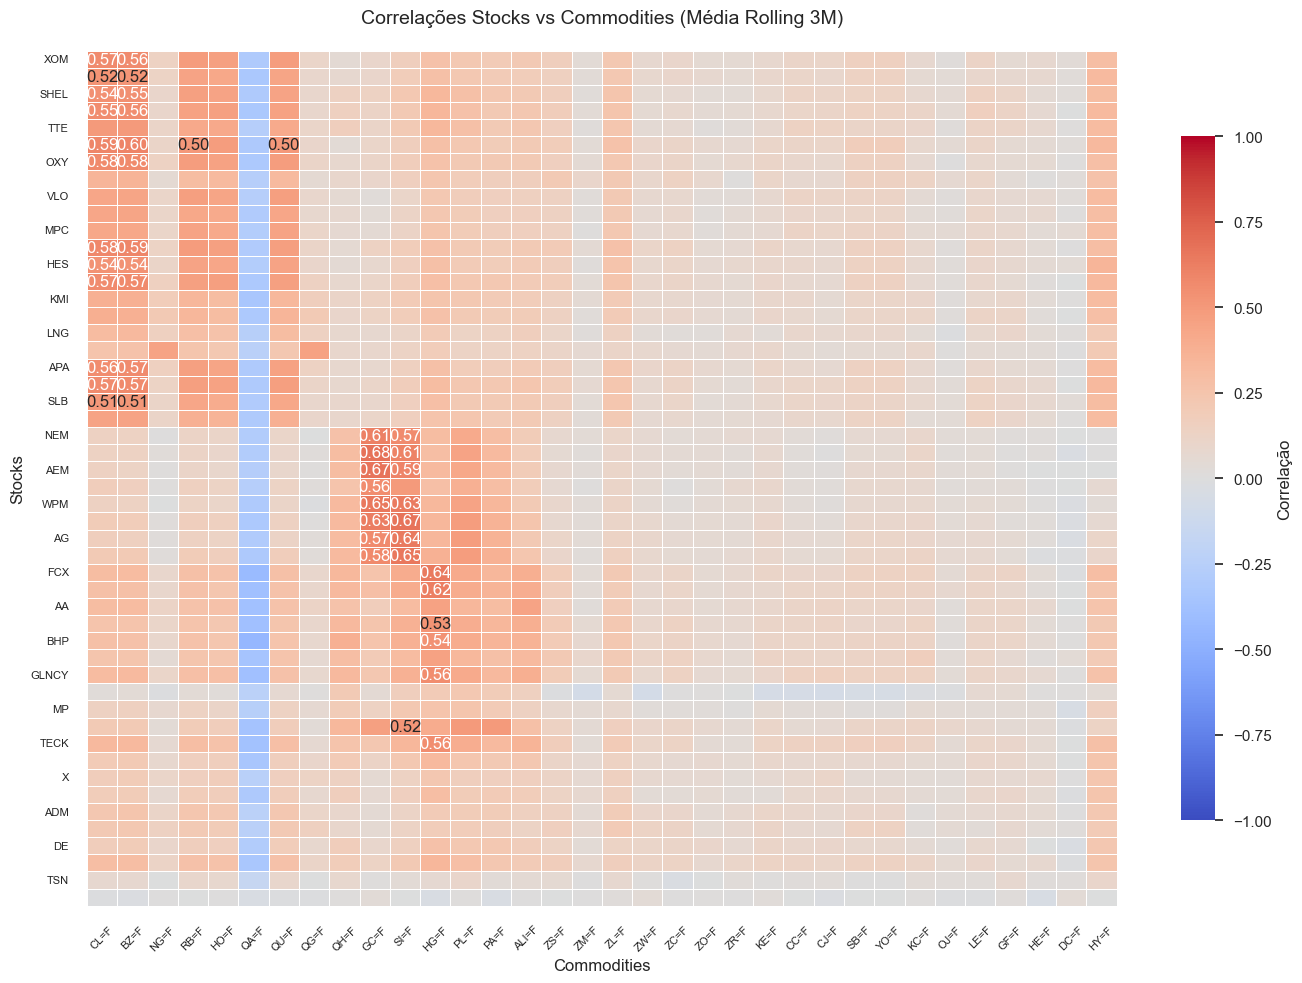


Top 30 pares mais correlacionados:
GOLD  GC=F    0.679191
PAAS  SI=F    0.669964
AEM   GC=F    0.667632
WPM   GC=F    0.653949
HL    SI=F    0.649655
FCX   HG=F    0.644034
AG    SI=F    0.643033
WPM   SI=F    0.634308
PAAS  GC=F    0.631233
SCCO  HG=F    0.623305
NEM   GC=F    0.612027
GOLD  SI=F    0.608193
COP   BZ=F    0.596809
AEM   SI=F    0.594392
COP   CL=F    0.592133
EOG   BZ=F    0.587316
      CL=F    0.579501
OXY   BZ=F    0.578087
HL    GC=F    0.577377
OXY   CL=F    0.575308
HAL   BZ=F    0.573804
DVN   BZ=F    0.573138
XOM   CL=F    0.570176
HAL   CL=F    0.570101
DVN   CL=F    0.569104
AG    GC=F    0.567946
NEM   SI=F    0.567829
APA   BZ=F    0.567620
XOM   BZ=F    0.564912
TECK  HG=F    0.562020

Salvando resultados...

Análise concluída com sucesso!
Melhor par: ('GOLD', 'GC=F') com correlação 0.679


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Configurações iniciais (mantidas conforme seu original)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", rc={'figure.figsize':(12,8)})

# 1. Carregar os dados salvos (mantido igual)
try:
    data = pd.read_csv('stocks_commodities_data.csv', index_col=0, parse_dates=True)
    print("Dados carregados com sucesso. Shape:", data.shape)
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho ou execute o código de download primeiro.")
    exit()

# 2. Pré-processamento dos dados (mantido igual)
print("\nPré-processando dados...")
data_cleaned = data.ffill().bfill()
returns = np.log(data_cleaned/data_cleaned.shift(1)).dropna()

# 3. Separar stocks e commodities (mantido igual)
print("\nSeparando stocks e commodities...")
commodity_cols = [col for col in returns.columns if '=F' in col]
stock_cols = [col for col in returns.columns if '=F' not in col]

# 4. Matriz de Correlação Rolling (mantido igual)
print("\nCalculando correlações rolling...")

def calculate_rolling_correlations(stocks, commodities, window=63):
    corr_matrix = pd.DataFrame(index=stocks, columns=commodities)
    
    for stock in stocks:
        for commodity in commodities:
            try:
                rolling_corr = returns[stock].rolling(window).corr(returns[commodity])
                mean_corr = float(rolling_corr.mean())
                corr_matrix.loc[stock, commodity] = mean_corr
            except Exception as e:
                corr_matrix.loc[stock, commodity] = np.nan
                
    return corr_matrix.dropna(how='all').dropna(axis=1, how='all')

# Calcular para um subconjunto (mantido igual)
sample_stocks = stock_cols[:50]
rolling_corr_matrix = calculate_rolling_correlations(sample_stocks, commodity_cols)
rolling_corr_matrix = rolling_corr_matrix.astype(float)

# 5. Visualização dos Resultados (MODIFICADO APENAS ESTA PARTE)
print("\nCriando visualizações...")

plt.figure(figsize=(14, 10))
try:
    # Criar matriz de anotações: números apenas onde correlação > 0.5
    annotations = rolling_corr_matrix.applymap(lambda x: f"{x:.2f}" if x > 0.5 else "")

    heatmap = sns.heatmap(
        rolling_corr_matrix,
        cmap='coolwarm',
        center=0,
        vmin=-1,
        vmax=1,
        annot=annotations,
        fmt="",
        linewidths=.5,
        cbar_kws={'label': 'Correlação', 'shrink': 0.8}
    )
    plt.title('Correlações Stocks vs Commodities (Média Rolling 3M)', pad=20, fontsize=14)
    plt.xlabel('Commodities', fontsize=12)
    plt.ylabel('Stocks', fontsize=12)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.savefig('correlations_heatmap.png', bbox_inches='tight', dpi=300)
    plt.show()
except Exception as e:
    print(f"Erro ao criar heatmap: {e}")

# 6. Análise dos Melhores Pares (mantido igual)
print("\nTop 30 pares mais correlacionados:")
top_pairs = rolling_corr_matrix.stack().sort_values(key=abs, ascending=False).head(30)
print(top_pairs.to_string())

# 7. Salvar Resultados (mantido igual)
print("\nSalvando resultados...")
rolling_corr_matrix.to_csv('rolling_correlations.csv')
top_pairs.to_csv('top_correlated_pairs.csv')

print("\nAnálise concluída com sucesso!")
print(f"Melhor par: {top_pairs.index[0]} com correlação {top_pairs.iloc[0]:.3f}")

dbscan

Aumentar o valor de min_samples — Isso exige mais ativos para formar um cluster, reduzindo a quantidade de clusters pequenos.

Diminuir o valor de eps — Isso torna o critério de agrupamento mais rigoroso, formando menos clusters.

Filtrar por correlação mínima — Definir um limite mínimo de correlação (por exemplo, corr > 0.7) antes de aplicar o DBSCAN.

Remover redundância nos pares — Eliminar pares duplicados e manter apenas uma direção (exemplo: (A, B) e não (B, A)).